# <h1><center>Sentiment analysis - Clothing Reviews</center></h1>

# Problema

Neste projeto, foi utilizado o conjunto de dados intitulado Women's E-Commerce Clothing Reviews, disponibilizado na plataforma Kaggle. Esse conjunto cont√©m informa√ß√µes provenientes de avalia√ß√µes textuais realizadas por clientes de uma loja virtual especializada em vestu√°rio feminino.

A an√°lise de avalia√ß√µes de clientes configura-se como uma pr√°tica estrat√©gica fundamental no contexto empresarial contempor√¢neo, uma vez que possibilita a obten√ß√£o de insights relevantes acerca da satisfa√ß√£o do consumidor, da percep√ß√£o da qualidade dos produtos e da identifica√ß√£o de aspectos que demandam melhorias. A compreens√£o aprofundada das opini√µes e sentimentos expressos pelos clientes permite que as organiza√ß√µes tomem decis√µes mais embasadas, orientando o aprimoramento de produtos, o redesenho de estrat√©gias de marketing e o fortalecimento da experi√™ncia de compra.

Al√©m disso, o estudo sistem√°tico dessas avalia√ß√µes pode auxiliar na detec√ß√£o de tend√™ncias emergentes, na antecipa√ß√£o de demandas do mercado e na resolu√ß√£o proativa de eventuais problemas, promovendo, assim, uma rela√ß√£o mais personalizada e eficaz com o p√∫blico-alvo. Em √∫ltima inst√¢ncia, tais a√ß√µes contribuem n√£o apenas para o aumento da satisfa√ß√£o e da lealdade dos clientes, mas tamb√©m para a maximiza√ß√£o da competitividade e da rentabilidade da empresa no mercado.

O data set possui 23482 linhas e 10 features (atributos). Cada linha corresponde ao review do consumidor. Veja abaixo a lista de vari√°vies dos dados.

`Clothing ID`: Vari√°vel categ√≥rica inteira que se refere √† pe√ßa espec√≠fica sendo avaliada.

`Age`: Vari√°vel inteira positiva que representa a idade do avaliador.

`Title`: T√≠tulo da avalia√ß√£o.

`Review Text`: Corpo da avalia√ß√£o (texto).

`Rating`: Vari√°vel inteira ordinal positiva para a pontua√ß√£o do produto dada pelo cliente, de 1 (Pior) a 5 (Melhor).

`Recommended IND`: Vari√°vel bin√°ria indicando se o cliente recomenda o produto, onde 1 √© recomendado e 0 n√£o √© recomendado.

`Positive Feedback Count`: Inteiro positivo que documenta o n√∫mero de outros clientes que consideraram esta avalia√ß√£o positiva.

`Division Name`: Nome categ√≥rico da divis√£o de alto n√≠vel do produto.

`Department Name`: Nome categ√≥rico do departamento do produto.

`Class Name`: Nome categ√≥rico da classe do produto.

O dataset pode ser encontrado no link: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

# An√°lise de sentimentos

A an√°lise de sentimento √© uma tarefa fundamental no processamento de linguagem natural (NLP) e consiste em identificar e extrair sentimentos expressos em texto. No contexto deste dataset, a an√°lise de sentimento pode ajudar a determinar a opini√£o dos clientes em rela√ß√£o aos produtos, o que pode fornecer insights valiosos para a loja. Por exemplo, a loja pode identificar produtos populares ou detectar problemas recorrentes com certos itens.

# Por que utilizar Redes Neurais?

As redes neurais t√™m se mostrado extremamente eficazes na resolu√ß√£o de problemas de NLP, especialmente para tarefas complexas como a an√°lise de sentimento. As redes neurais podem capturar padr√µes complexos nos dados e lidar com a variabilidade e nuances da linguagem humana.

# An√°lise explorat√≥ria dos dados

## Leitura e pr√©-processamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando o dataset
url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df = pd.read_csv(url,index_col=0)

df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
# Verificar informa√ß√µes b√°sicas do dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

Checamos a quantidade de NA em cada atributo da base de dados.

In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Para `Review Text` e `Title`, substitu√≠mos os NAs por strings vazias. Al√©m disso, optamos por combinar o t√≠tulo e texto a avalia√ß√£o em um √∫nico atributo, chamado `Combined_Text`.

In [ ]:
# Preencher dados de texto ausentes com strings vazias
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')

# Combinar T√≠tulo e Texto da Avalia√ß√£o
df['Combined_Text'] = df['Title'] + ' ' + df['Review Text']

# Transformar dados qualitativos em dummies
df = pd.get_dummies(df, columns=['Division Name', 'Department Name', 'Class Name'], drop_first=False)

### Distribui√ß√£o das Avalia√ß√µes (Rating)

<ipython-input-6-aeedd67034f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


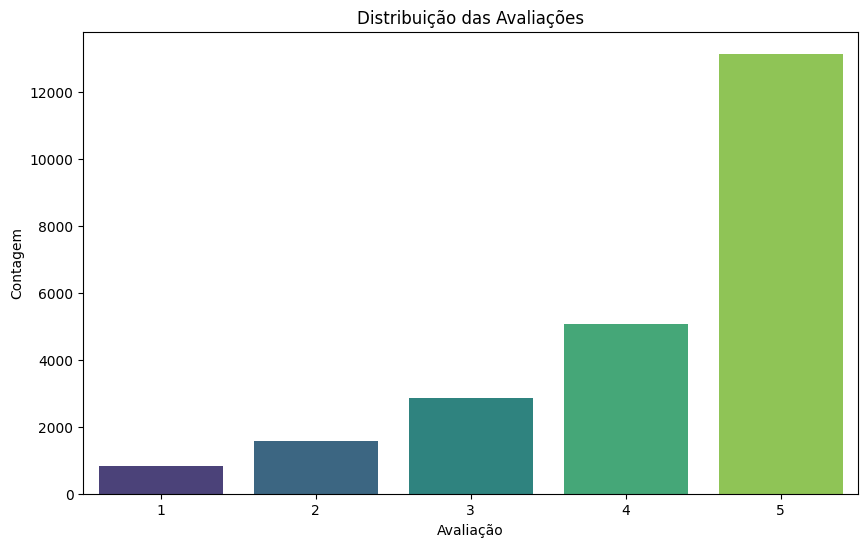

In [ ]:
# Plotar a distribui√ß√£o das avalia√ß√µes
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribui√ß√£o das Avalia√ß√µes')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('Contagem')
plt.show()

Vemos que grande parte das avalia√ß√µes possuem nota 5. A contagem de avalia√ß√µes decresce conforme os ratings dados decrescem tamb√©m.

## Distribui√ß√£o da Idade dos Avaliadores

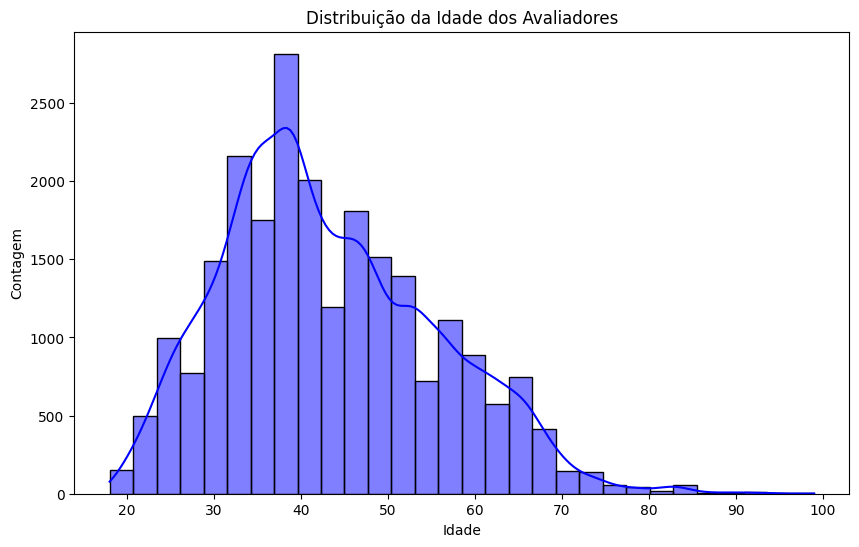

In [ ]:
# Plotar a distribui√ß√£o da idade dos avaliadores
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribui√ß√£o da Idade dos Avaliadores')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [ ]:
df['Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

## Contagem de Avalia√ß√µes por Departamento

<ipython-input-9-7c602963efac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department Name', data=df, palette='magma', order=df['Department Name'].value_counts().index)


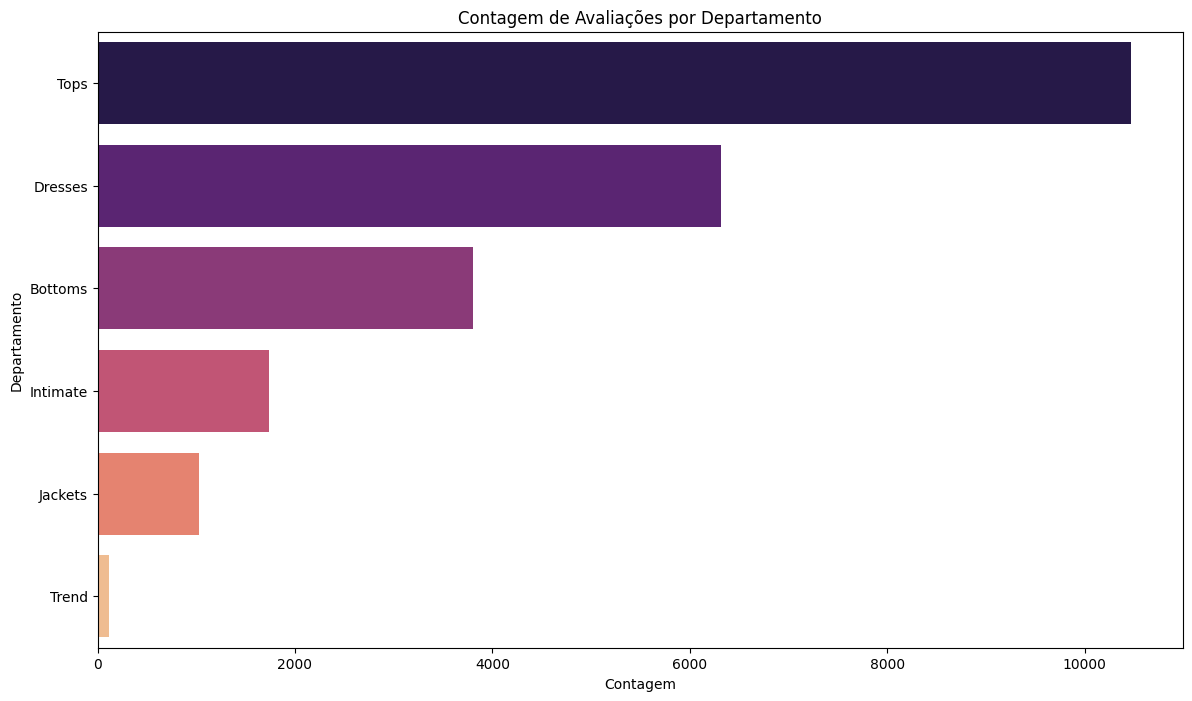

In [ ]:
# Plotar a contagem de avalia√ß√µes por departamento
plt.figure(figsize=(14, 8))
sns.countplot(y='Department Name', data=df, palette='magma', order=df['Department Name'].value_counts().index)
plt.title('Contagem de Avalia√ß√µes por Departamento')
plt.xlabel('Contagem')
plt.ylabel('Departamento')
plt.show()

## Contagem de Avalia√ß√µes por Classe de Produto

<ipython-input-10-c5dd2428ed74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Class Name', data=df, palette='cool', order=df['Class Name'].value_counts().index)


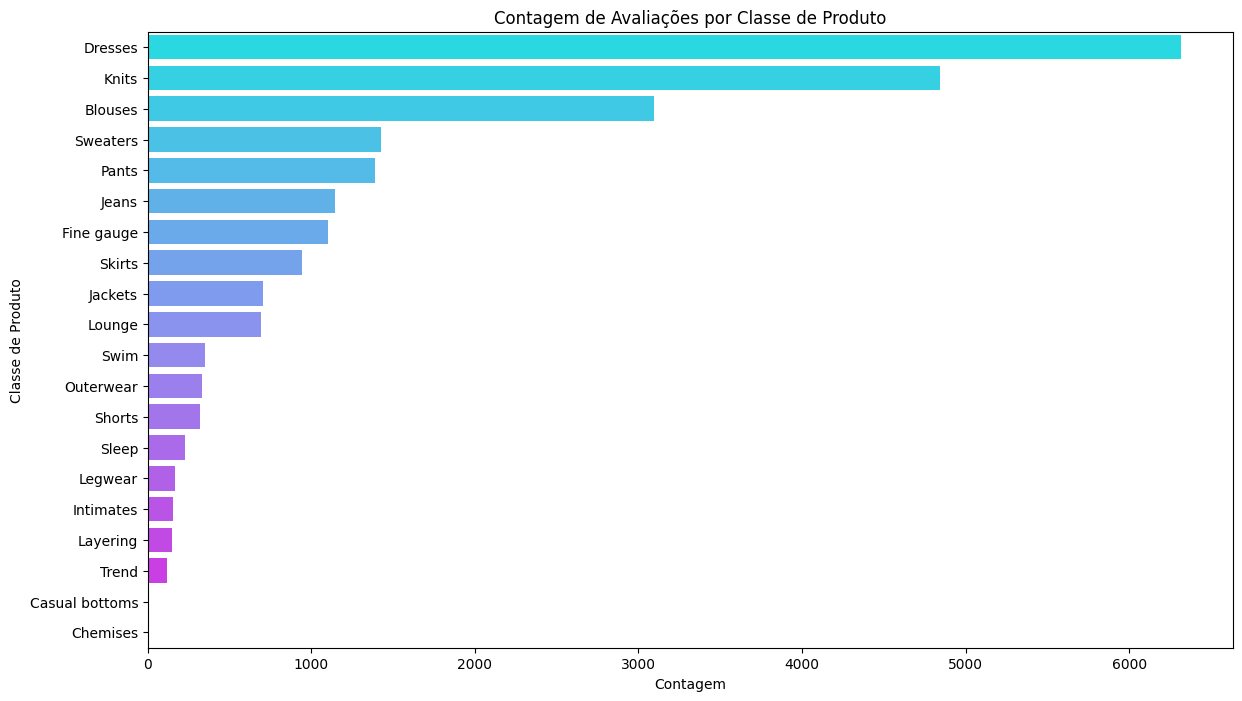

In [ ]:
# Plotar a contagem de avalia√ß√µes por classe de produto
plt.figure(figsize=(14, 8))
sns.countplot(y='Class Name', data=df, palette='cool', order=df['Class Name'].value_counts().index)
plt.title('Contagem de Avalia√ß√µes por Classe de Produto')
plt.xlabel('Contagem')
plt.ylabel('Classe de Produto')
plt.show()

## An√°lise de Feedback Positivo

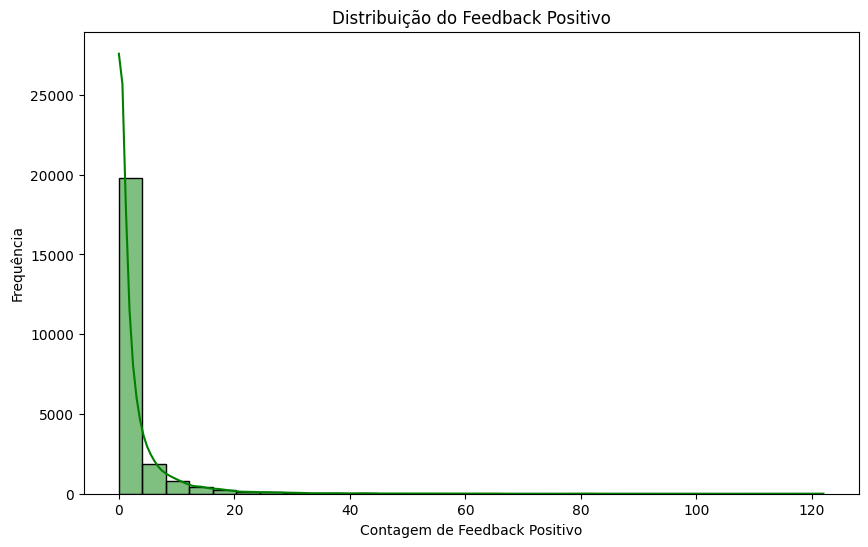

<ipython-input-11-6959ceb8a35a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Positive Feedback Count', data=feedback_avg, palette='rocket')


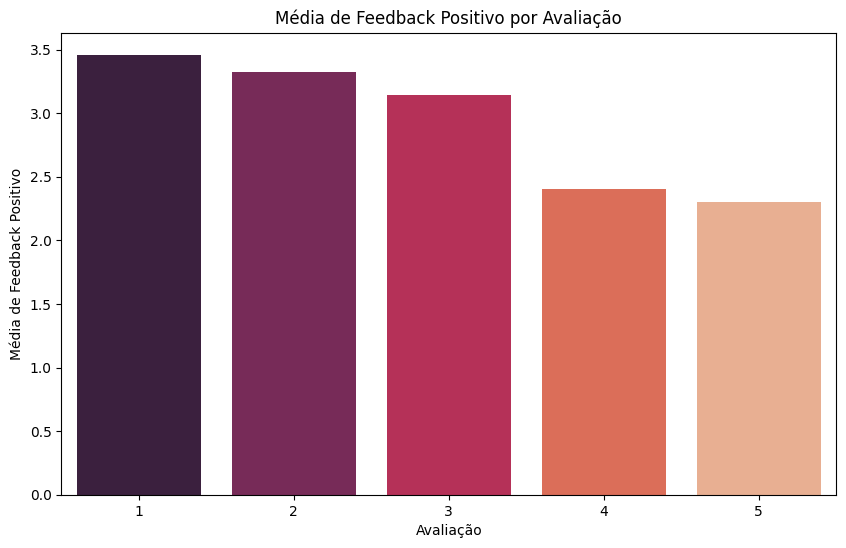

In [ ]:
# Plotar a distribui√ß√£o do feedback positivo
plt.figure(figsize=(10, 6))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=True, color='green')
plt.title('Distribui√ß√£o do Feedback Positivo')
plt.xlabel('Contagem de Feedback Positivo')
plt.ylabel('Frequ√™ncia')
plt.show()

# Calcular a m√©dia de feedback positivo por avalia√ß√£o
feedback_avg = df.groupby('Rating')['Positive Feedback Count'].mean().reset_index()

# Plotar a m√©dia de feedback positivo por avalia√ß√£o
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Positive Feedback Count', data=feedback_avg, palette='rocket')
plt.title('M√©dia de Feedback Positivo por Avalia√ß√£o')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('M√©dia de Feedback Positivo')
plt.show()

## An√°lise de Recomenda√ß√µes

<ipython-input-12-62f4fef052e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended IND', data=df, palette='viridis')


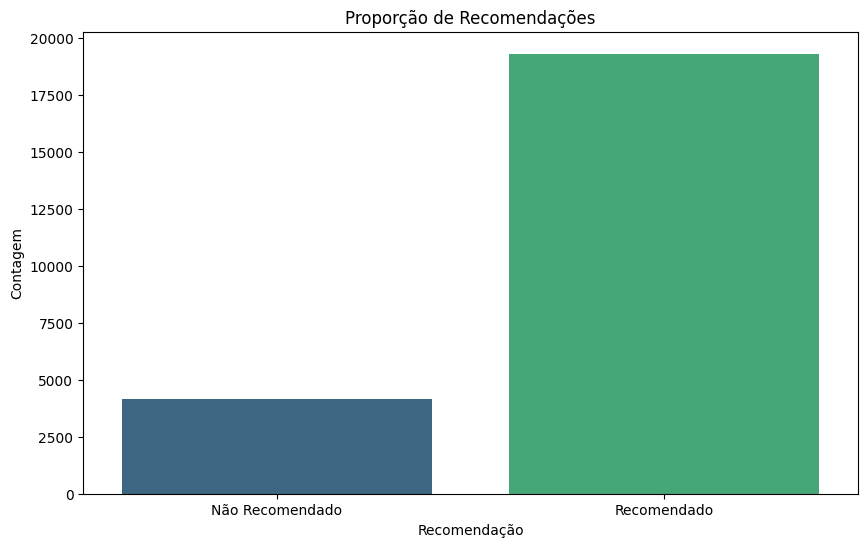

<ipython-input-12-62f4fef052e3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Recommended IND', data=recommendation_by_rating, palette='coolwarm')


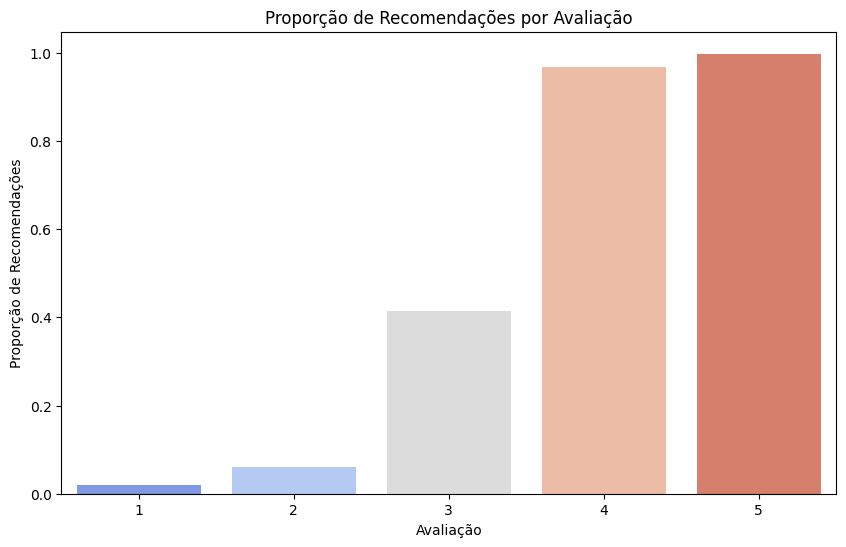

In [ ]:
# Plotar a propor√ß√£o de recomenda√ß√µes
plt.figure(figsize=(10, 6))
sns.countplot(x='Recommended IND', data=df, palette='viridis')
plt.title('Propor√ß√£o de Recomenda√ß√µes')
plt.xlabel('Recomenda√ß√£o')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['N√£o Recomendado', 'Recomendado'])
plt.show()

# An√°lise de recomenda√ß√£o por avalia√ß√£o
recommendation_by_rating = df.groupby('Rating')['Recommended IND'].mean().reset_index()

# Plotar a propor√ß√£o de recomenda√ß√µes por avalia√ß√£o
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Recommended IND', data=recommendation_by_rating, palette='coolwarm')
plt.title('Propor√ß√£o de Recomenda√ß√µes por Avalia√ß√£o')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('Propor√ß√£o de Recomenda√ß√µes')
plt.show()

## An√°lise de Tamanho do Texto das Avalia√ß√µes

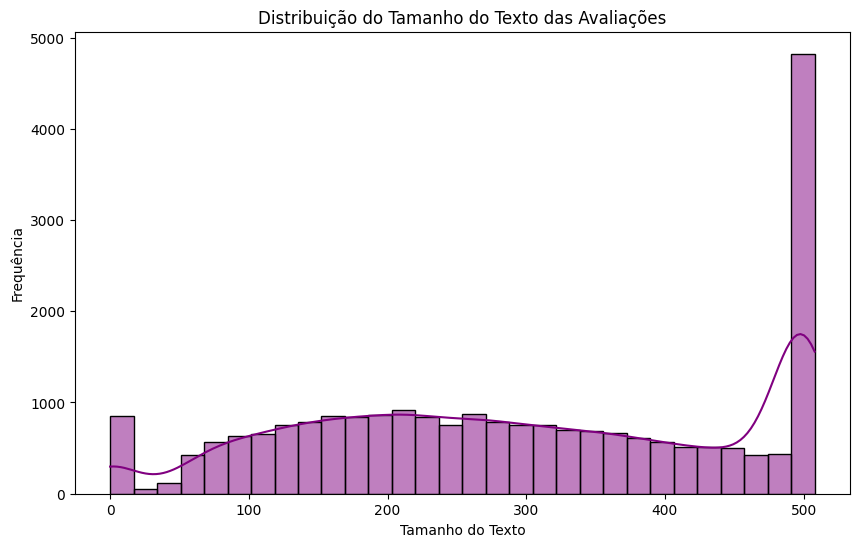

<ipython-input-13-d09eaafa6e3e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Review Length', data=length_by_rating, palette='cubehelix')


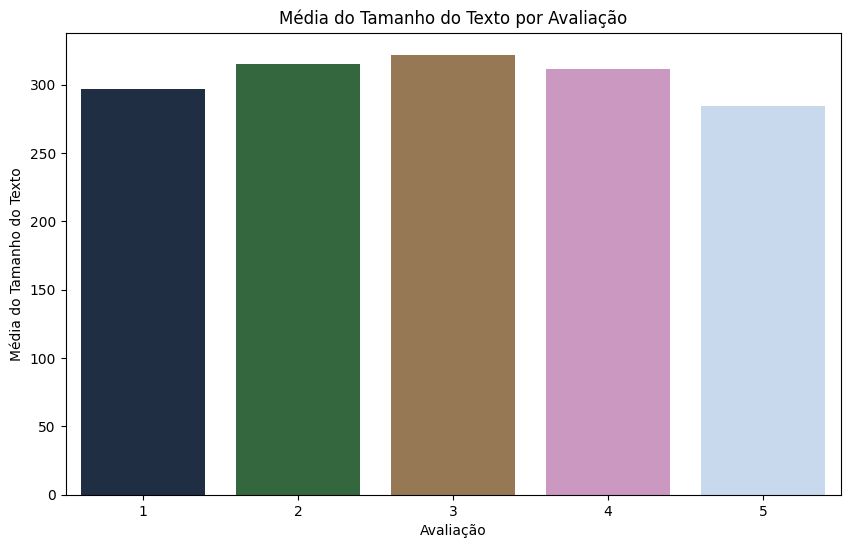

In [ ]:
# Calcular o tamanho do texto das avalia√ß√µes
df['Review Length'] = df['Review Text'].apply(len)

# Plotar a distribui√ß√£o do tamanho do texto das avalia√ß√µes
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='purple')
plt.title('Distribui√ß√£o do Tamanho do Texto das Avalia√ß√µes')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequ√™ncia')
plt.show()

# An√°lise do tamanho do texto por avalia√ß√£o
length_by_rating = df.groupby('Rating')['Review Length'].mean().reset_index()

# Plotar a m√©dia do tamanho do texto por avalia√ß√£o
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Review Length', data=length_by_rating, palette='cubehelix')
plt.title('M√©dia do Tamanho do Texto por Avalia√ß√£o')
plt.xlabel('Avalia√ß√£o')
plt.ylabel('M√©dia do Tamanho do Texto')
plt.show()

## Nuvem de Palavras das Avalia√ß√µes

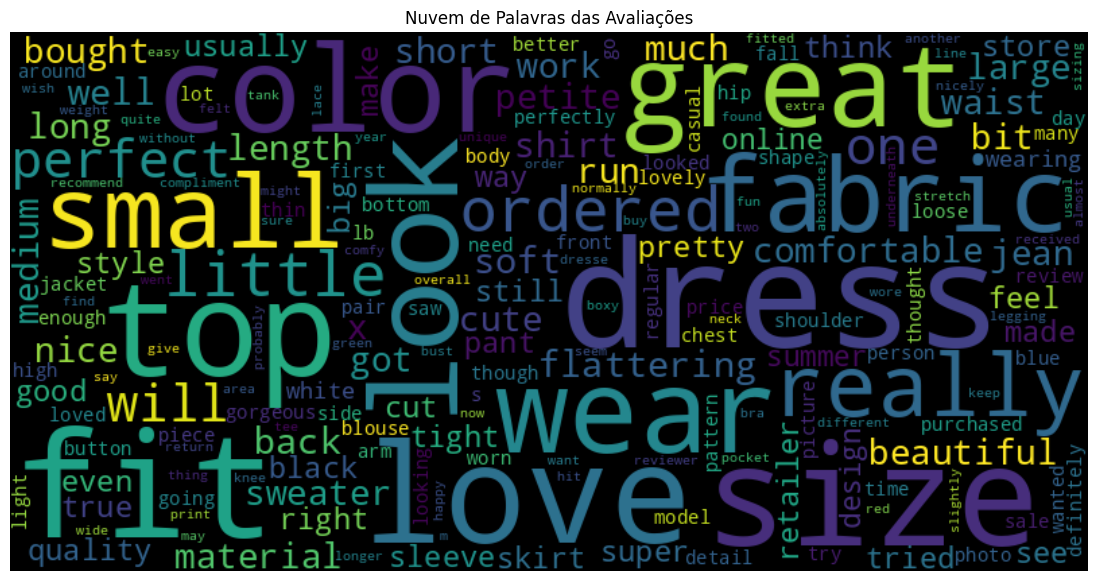

In [ ]:
from wordcloud import WordCloud

# Gerar uma nuvem de palavras para as avalia√ß√µes
text = " ".join(review for review in df['Review Text'])

wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras das Avalia√ß√µes')
plt.axis('off')
plt.show()

## Correla√ß√£o entre vari√°veis

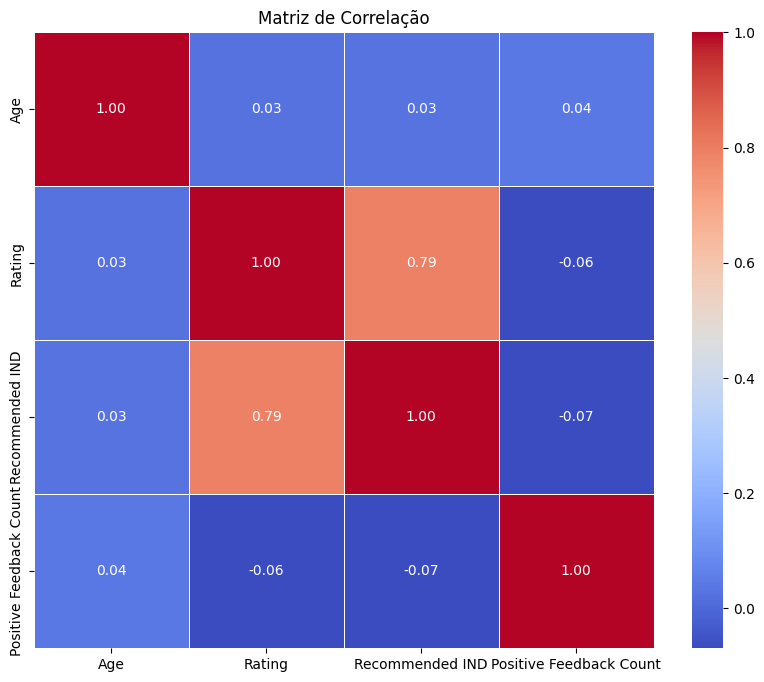

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age','Rating','Recommended IND', 'Positive Feedback Count']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correla√ß√£o')
plt.show()

## Boxplot da Avalia√ß√£o por Recomenda√ß√£o

<ipython-input-23-aacc629f6663>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended IND', y='Rating', data=df, palette='viridis')


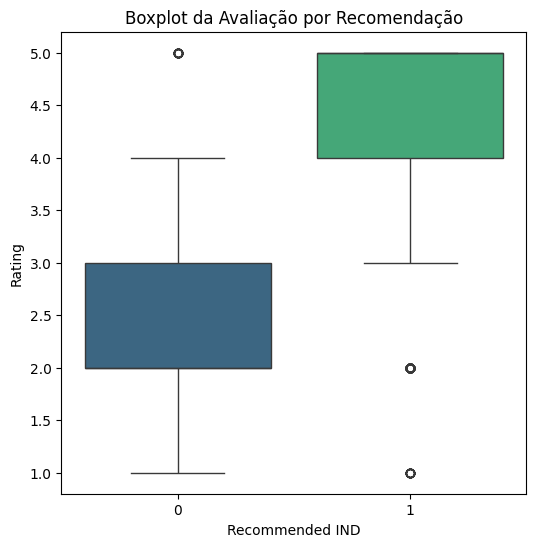

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Recommended IND', y='Rating', data=df, palette='viridis')
plt.title('Boxplot da Avalia√ß√£o por Recomenda√ß√£o')
plt.xlabel('Recommended IND')
plt.ylabel('Rating')
plt.show()

## Quantidade de Notas 1 por Departamento

<ipython-input-30-ebd472f674b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_rated_departments.index, y=low_rated_departments.values, palette='magma')


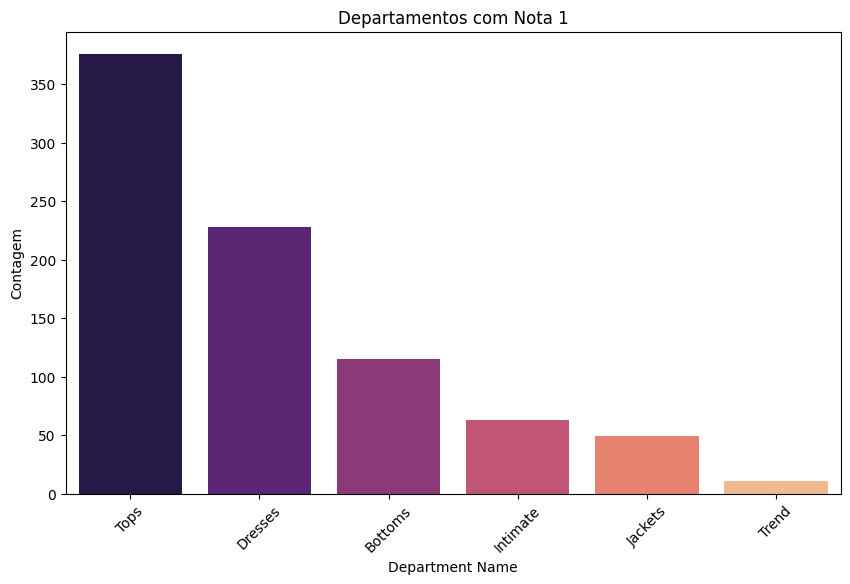

In [ ]:
low_rated_departments = df[df['Rating'] == 1]['Department Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=low_rated_departments.index, y=low_rated_departments.values, palette='magma')
plt.title('Departamentos com Nota 1')
plt.xlabel('Department Name')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

## Quantidade de Notas 1 por Divis√£o

<ipython-input-32-a95598509df0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_rated_divisions.index, y=low_rated_divisions.values, palette='magma')


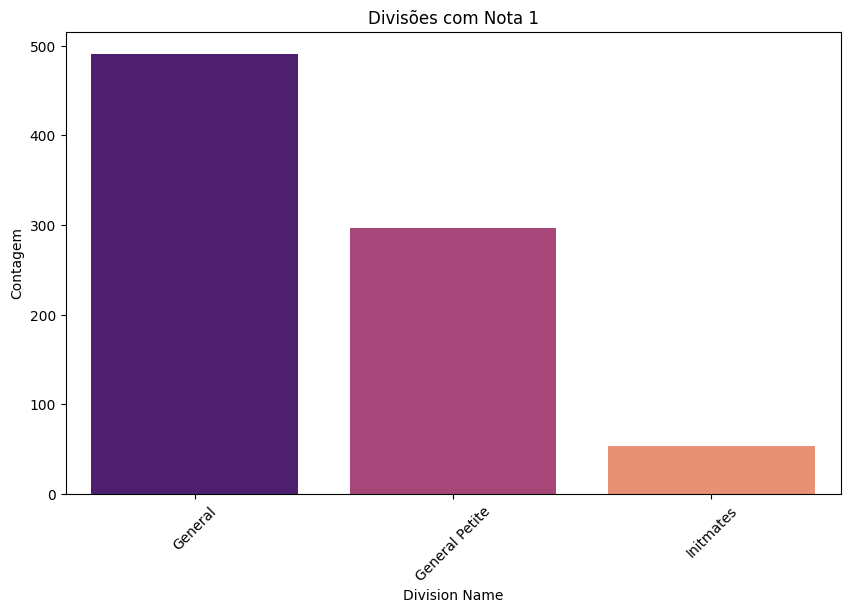

In [ ]:
low_rated_divisions = df[df['Rating'] == 1]['Division Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=low_rated_divisions.index, y=low_rated_divisions.values, palette='magma')
plt.title('Divis√µes com Nota 1')
plt.xlabel('Division Name')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Modelagem

## Tratamento dos dados para a modelagem

In [ ]:
import pandas as pd
from keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, SpatialDropout1D
from sklearn.preprocessing import StandardScaler
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.python.keras import backend as K
import torch
from transformers import DistilBertTokenizer, DistilBertModel
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize

## Modelos utilizados

### Modelo Baseline - Floresta Aleat√≥ria com TF-IDF

#### Tratamento do texto

**TF-IDF** √© uma t√©cnica estat√≠stica que reflete a import√¢ncia de uma palavra em um documento em rela√ß√£o a uma cole√ß√£o de documentos (ou corpus). O m√©todo √© uma combina√ß√£o de duas m√©tricas: TF (Term Frequency) e IDF (Inverse Document Frequency).

**Term Frequency (TF)** √© uma medida da frequ√™ncia de uma palavra em um documento.

**Inverse Document Frequency (IDF)** √© uma medida de quantas vezes uma palavra aparece nos documentos do corpus. A ideia √© diminuir o peso das palavras muito comuns e aumentar o peso das palavras que s√£o raras.

<br>

A m√©trica TF-IDF √© calculada multiplicando-se o TF pelo IDF:

<br>

$TF-IDF(t,d,D)=TF(t,d)√óIDF(t,D)$, em que:

<br>

$ùë°$ √© o termo (palavra) espec√≠fico.

$ùëë$ √© um documento espec√≠fico.

$ùê∑$ √© o corpus (cole√ß√£o de todos os documentos).

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['Combined_Text']).toarray()

print(X_text)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Tratamento das vari√°veis num√©ricas

Padronizamos os dados num√©ricos com StandardScaler.

In [ ]:
# Padroniza√ß√£o dos dados
scaler = StandardScaler()
X_other = scaler.fit_transform(df.drop(['Rating', 'Title', 'Review Text', 'Combined_Text'], axis=1))

#### Vari√°veis da modelagem

Chamamos as covari√°veis de `X` e a vari√°vel resposta de `y`.



In [ ]:
# Juntando os dados textuais e num√©ricos tratados
X = np.concatenate((X_text, X_other), axis=1)
y = df['Rating']

Separamos os dados em treino e teste.

In [ ]:
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Treinamento

Treinamos o modelo Random Forest com os dados de treinamento.

In [ ]:
# Treinando o modelo com os dados
model = RandomForestClassifier(n_estimators=100, random_state=123)
model_fitted = model.fit(X_train, y_train)

Chamamos de `y_pred` as predi√ß√µes do modelo com os dados de teste.

In [ ]:
# Predi√ß√µes
y_pred = model_fitted.predict(X_test)

#### M√©tricas

##### Classification Report

In [ ]:
# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acur√°cia - Floresta Aleat√≥ria: {acuracia}')
print(classification_report(y_test, y_pred))

Acur√°cia - Floresta Aleat√≥ria: 0.633886760323542
              precision    recall  f1-score   support

           1       0.56      0.06      0.10       163
           2       0.38      0.15      0.22       285
           3       0.42      0.42      0.42       549
           4       0.50      0.07      0.12      1042
           5       0.68      0.99      0.80      2659

    accuracy                           0.63      4698
   macro avg       0.51      0.34      0.33      4698
weighted avg       0.59      0.63      0.55      4698



* **Classe 1**: Para a Classe 1, a precis√£o √© relativamente alta (0.56), o que significa que quando o modelo prev√™ esta classe, ele est√° correto 56% das vezes. No entanto, o recall √© extremamente baixo (0.06), indicando que apenas 6% das inst√¢ncias reais desta classe s√£o corretamente identificadas pelo modelo. O f1-score tamb√©m √© baixo (0.10), refletindo o equil√≠brio entre precis√£o e recall. O suporte √© 163, indicando o n√∫mero de inst√¢ncias reais desta classe.

* **Classe 2**: Para a Classe 2, a precis√£o √© de 0.38, indicando que o modelo √© correto em 38% das previs√µes desta classe. O recall √© 0.15, mostrando que 15% das inst√¢ncias reais desta classe s√£o corretamente identificadas. O f1-score √© 0.22, refletindo o desempenho intermedi√°rio entre precis√£o e recall. O suporte √© 285.

* **Classe 3**: Para a Classe 3, a precis√£o e o recall s√£o ambos 0.42, o que √© melhor equilibrado em compara√ß√£o com as Classes 1 e 2. O f1-score √© 0.42, indicando um desempenho m√©dio. O suporte √© 549.

* **Classe 4**: Para a Classe 4, a precis√£o √© 0.50, mas o recall √© muito baixo (0.07), indicando que apenas 7% das inst√¢ncias reais s√£o corretamente identificadas. O f1-score √© 0.12, refletindo um desempenho fraco. O suporte √© 1042.

* **Classe 5**: Para a Classe 5, a precis√£o √© 0.68, indicando que 68% das previs√µes desta classe s√£o corretas. O recall √© muito alto (0.99), significando que 99% das inst√¢ncias reais s√£o identificadas corretamente. O f1-score √© 0.80, refletindo um desempenho robusto. O suporte √© 2659.

* **An√°lise Global**: A acur√°cia geral √© 0.63, indicando um desempenho moderado do modelo. A macro m√©dia, que √© a m√©dia aritm√©tica das m√©tricas de todas as classes, mostra valores relativamente baixos para precis√£o, recall e f1-score, sugerindo que o modelo n√£o est√° performando bem de forma consistente em todas as classes. A weighted m√©dia, que leva em considera√ß√£o o suporte de cada classe, mostra uma precis√£o de 0.59, recall de 0.63 e f1-score de 0.55.

##### Matriz de Confus√£o

Avalia√ß√£o do modelo com Matriz de Confus√£o.

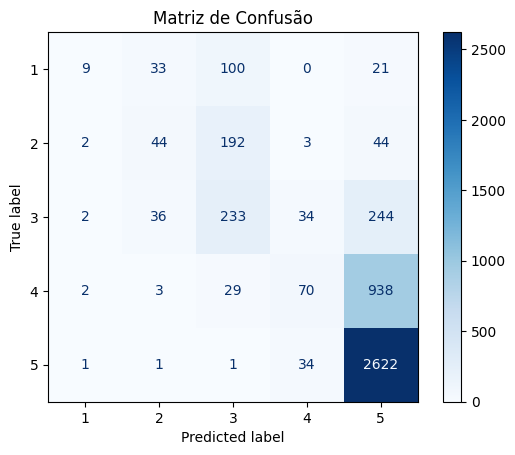

In [ ]:
# Supondo que y_true e y_pred s√£o os valores verdadeiros e previstos, respectivamente
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_fitted.classes_)
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Matriz de Confus√£o')
plt.show()

* **Classe 1**: Das 163 inst√¢ncias verdadeiras da Classe 1, apenas 9 foram corretamente classificadas como 1. Um n√∫mero significativo foi classificado incorretamente como 3 (100 inst√¢ncias) e 2 (33 inst√¢ncias). Isso explica o baixo recall e f1-score para esta classe.

* **Classe 2**: Das 285 inst√¢ncias verdadeiras da Classe 2, 44 foram corretamente classificadas como 2. Um n√∫mero muito maior foi classificado incorretamente como 3 (192 inst√¢ncias), seguido por 44 inst√¢ncias como 5. Isso contribui para o baixo recall e f1-score.

* **Classe 3**: Para as 549 inst√¢ncias verdadeiras da Classe 3, 233 foram corretamente classificadas como 3. No entanto, um n√∫mero substancial foi classificado como 5 (244 inst√¢ncias) e 36 como 2. Isso indica um certo grau de confus√£o entre as classes 3 e 5.

* **Classe 4**: Para as 1042 inst√¢ncias verdadeiras da Classe 4, apenas 70 foram corretamente classificadas como 4, enquanto a grande maioria foi classificada incorretamente como 5 (938 inst√¢ncias). Este alto grau de confus√£o com a Classe 5 explica o baixo recall e f1-score para a Classe 4.

* **Classe 5**: Das 2659 inst√¢ncias verdadeiras da Classe 5, 2622 foram corretamente classificadas como 5, mostrando um alto recall. Apenas 37 inst√¢ncias foram classificadas incorretamente, o que explica o alto desempenho em termos de recall e f1-score.

</br></br>

* **Conclus√£o**:

  A matriz de confus√£o revela algumas tend√™ncias importantes:

  **Classe 5:** O modelo √© extremamente eficaz em identificar inst√¢ncias da Classe 5, com muito poucas classifica√ß√µes incorretas.

  **Classes 1 e 4:** H√° uma significativa confus√£o com outras classes, especialmente com a Classe 5, resultando em baixas m√©tricas de desempenho.

  **Classes 2 e 3:** Embora haja algum n√≠vel de precis√£o, muitas inst√¢ncias s√£o classificadas incorretamente, especialmente como Classe 3 e Classe 5.

  Essa an√°lise sugere que o modelo tem dificuldades em distinguir entre v√°rias classes, especialmente quando h√° uma classe dominante como a Classe 5. Ajustes adicionais, como balanceamento das classes, engenharia de caracter√≠sticas ou ajuste de hiperpar√¢metros do modelo, podem ser necess√°rios para melhorar o desempenho nas classes menos representadas.

##### AUC

In [ ]:
# Calcular AUC para problemas multiclasse especificando 'ovo' ou 'ovr'
# y_pred_prob deve ser um array de shape (n_samples, n_classes)
auc_ovo = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')  # One-vs-One
auc_ovr = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # One-vs-Rest

print(f'AUC (One-vs-One): {auc_ovo}')
print(f'AUC (One-vs-Rest): {auc_ovr}')

AUC (One-vs-One): 0.8046315936824172
AUC (One-vs-Rest): 0.8722947129297557


* **AUC (One-vs-One)** de 0.8046: Indica um desempenho bom, mas n√£o excelente, na distin√ß√£o entre pares de classes. H√° alguma confus√£o entre algumas classes, o que √© consistente com a an√°lise da matriz de confus√£o.

* **AUC (One-vs-Rest)** de 0.8723: Indica um desempenho muito bom na distin√ß√£o de cada classe individual contra todas as outras. O modelo √© mais eficaz quando se trata de identificar uma classe espec√≠fica em compara√ß√£o com as demais.

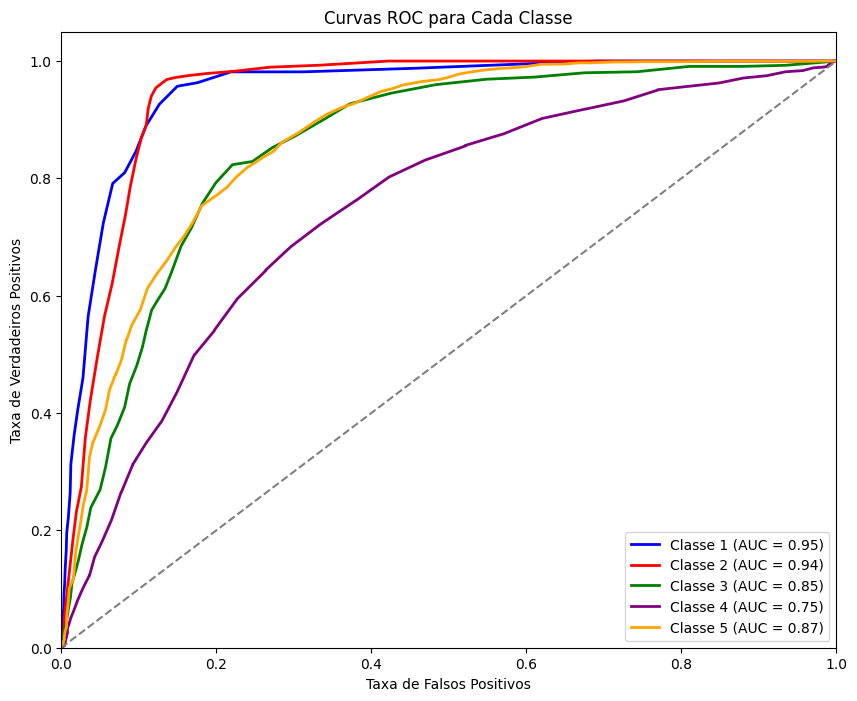

In [ ]:
# Prever probabilidades
y_pred_prob = model_fitted.predict_proba(X_test)

# Binarizar os r√≥tulos verdadeiros
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# N√∫mero de classes
n_classes = y_test_bin.shape[1]

# Inicializar vari√°veis para armazenar falsas taxas positivas (FPR), verdadeiras taxas positivas (TPR) e AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular a curva ROC e AUC para cada classe
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple','orange']
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Classe {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para Cada Classe')
plt.legend(loc="lower right")
plt.show()

* **Classes 1 e 2:** Desempenho excelente na distin√ß√£o destas classes contra todas as outras. As curvas ROC para estas classes estariam muito pr√≥ximas do canto superior esquerdo, indicando alta efic√°cia na classifica√ß√£o.

* **Classe 3:** Bom desempenho, mas n√£o t√£o excelente quanto as Classes 1 e 2. A curva ROC estaria claramente acima da linha de chance, refletindo um bom equil√≠brio entre verdadeiros positivos e falsos positivos.

* **Classe 4:** Desempenho razo√°vel, mas h√° espa√ßo significativo para melhorias. A curva ROC estaria mais pr√≥xima da linha de chance, indicando que o modelo tem dificuldades em distinguir esta classe das outras.

* **Classe 5:** Desempenho robusto, com a curva ROC bastante acima da linha de chance, mas n√£o t√£o pr√≥xima do canto superior esquerdo quanto as curvas das Classes 1 e 2.

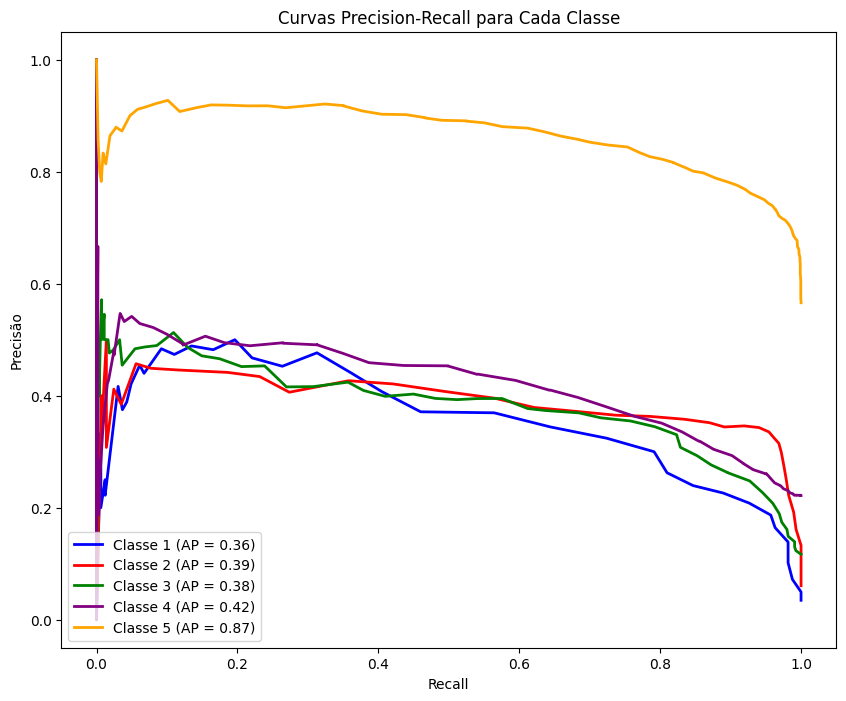

In [ ]:
# Prever probabilidades
y_pred_prob = model_fitted.predict_proba(X_test)

# Binarizar os r√≥tulos verdadeiros com as classes originais (1, 2, 3, 4, 5)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# N√∫mero de classes
n_classes = y_test_bin.shape[1]

# Inicializar vari√°veis para armazenar precis√£o, recall e AUCs
precision = dict()
recall = dict()
average_precision = dict()

# Calcular a curva Precision-Recall e AUC para cada classe
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plotar todas as curvas Precision-Recall
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Classe {classes[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precis√£o')
plt.title('Curvas Precision-Recall para Cada Classe')
plt.legend(loc="lower left")
plt.show()

* **Classe 1 (AP: 0.3569):** Desempenho relativamente fraco, indicando dificuldades em manter precis√£o enquanto maximiza o recall.

* **Classe 2 (AP: 0.3908):** Desempenho um pouco melhor do que a Classe 1, mas ainda n√£o satisfat√≥rio.

* **Classe 3 (AP: 0.3811):** Desempenho moderado, indicando que o modelo lida um pouco melhor com esta classe, mas ainda n√£o de forma ideal.

* **Classe 4 (AP: 0.4169):** Melhor desempenho comparado √†s Classes 1, 2 e 3, mas ainda longe de ser excelente.

* **Classe 5 (AP: 0.8654):** Excelente desempenho, refletindo a capacidade do modelo de manter alta precis√£o ao maximizar o recall, consistente com os resultados observados na matriz de confus√£o e AUC.

### Modelo Intermedi√°rio - Word2Vec + LSTM

As palavras em um texto aparecem em uma sequ√™ncia espec√≠fica. As Redes Neurais Recorrentes (RNN) s√£o modelos que consideram essa sequ√™ncia, processando as palavras na ordem em que surgem no texto. As Long Short-term Memory (LSTM) substitu√≠ram as RNNs tradicionais no campo de Aprendizado de M√°quina. As c√©lulas LSTM possuem vari√°veis internas que funcionam como uma mem√≥ria, aumentando ligeiramente o custo computacional, o que geralmente √© aceit√°vel.

Na constru√ß√£o deste modelo, utilizamos embeddings de palavras, empregando a t√©cnica Word2Vec. Esta t√©cnica foi apresentada em 2013 (Mikolov, Tomas, et al. (2013). ‚ÄúEfficient Estimation of Word Representations in Vector Space‚Äù) e teve um impacto significativo no Processamento de Linguagem Natural. A t√©cnica envolve descrever uma palavra usando um vetor de um tamanho espec√≠fico (geralmente 100 ou 300). O vetor de uma palavra √© definido pelo contexto em que aparece nos textos (ou seja, com base nas palavras ao seu redor). Tipicamente, word embbedings s√£o treinadas em grandes volumes de texto, entretanto utilizaremos aqui para ilustrar e como estudo para a disciplina. Palavras com significados semelhantes (sin√¥nimos) tendem a ficar pr√≥ximas umas das outras neste espa√ßo de palavras. A representa√ß√£o √© ‚Äúdensa‚Äù, em compara√ß√£o com a representa√ß√£o de vetor one-hot, que √© ‚Äúesparsa‚Äù.


A rotulagem da vari√°vel target n√£o pode ser manipulada como texto e precisa ser convertida em um one-hot vector.

In [ ]:
import re
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Abaixo repetimos alguns tratamentos, para que n√£o seja necess√°rio rodar partes anteriores do c√≥digo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df1 = pd.read_csv(url, index_col=0)

df1['Rating'] = df1['Rating'].astype(int)
num_classes = df1['Rating'].nunique()
labels = to_categorical(df1['Rating'] - 1, num_classes=num_classes)

df1['Title'] = df1['Title'].fillna('')
df1['Review Text'] = df1['Review Text'].fillna('')
df1['Combined_Text'] = df1['Title'] + ' ' + df1['Review Text']


O c√≥digo abaixo √© uma fun√ß√£o que processa `Combined_Text`, realizando uma s√©rie de opera√ß√µes de limpeza de texto.

- `re.sub` √© uma fun√ß√£o da biblioteca re que substitui partes de uma string com base em um padr√£o de express√£o regular. O padr√£o [^A-Za-z0-9\']+ corresponde a qualquer sequ√™ncia de caracteres que n√£o sejam letras (mai√∫sculas ou min√∫sculas), d√≠gitos ou ap√≥strofos. Esses caracteres s√£o substitu√≠dos por um espa√ßo (' ').

- O padr√£o [@] corresponde ao caractere '@'. O caractere '@' √© removido da string (substitu√≠do por uma string vazia).

- `string.printable` √© uma constante da biblioteca string que cont√©m todos os caracteres considerados imprim√≠veis, incluindo letras, n√∫meros, pontua√ß√£o e espa√ßo. A compreens√£o de lista [word for word in modified_string if word in string.printable] cria uma nova lista contendo apenas os caracteres da modified_string que est√£o presentes em string.printable. O m√©todo join une esses caracteres em uma nova string. A string resultante cont√©m apenas caracteres imprim√≠veis, removendo quaisquer caracteres especiais ou de controle.

- `.str.lower()` converte todas as strings da coluna para min√∫sculas.

- Cada texto na coluna Combined_Text √© processado pela fun√ß√£o clean_text_processed, e o texto limpo √© armazenado na coluna Processed_Text.



In [ ]:
def clean_text_processed(input_string):
    modified_string = re.sub('[^A-Za-z0-9\']+', ' ', input_string)
    #modified_string = re.sub('[0-9]+', ' ', modified_string)
    modified_string=re.sub("[@]","",modified_string)
    modified_string = ''.join([word for word in modified_string if word in string.printable])
    return(modified_string)
df1['Processed_Text'] = df1.Combined_Text.apply(clean_text_processed)
df1['Processed_Text']=df1['Processed_Text'].str.lower()
df1['Processed_Text']

0         absolutely wonderful silky and sexy and comfo...
1         love this dress it's sooo pretty i happened t...
2        some major design flaws i had such high hopes ...
3        my favorite buy i love love love this jumpsuit...
4        flattering shirt this shirt is very flattering...
                               ...                        
23481    great dress for many occasions i was very happ...
23482    wish it was made of cotton it reminds me of ma...
23483    cute but see through this fit well but the top...
23484    very cute dress perfect for summer parties and...
23485    please make more like this one this dress in a...
Name: Processed_Text, Length: 23486, dtype: object

Veja a coluna original 'Combined_Text' abaixo. O ap√≥strofo ' foi mantido.

In [ ]:
df1['Combined_Text']

0         Absolutely wonderful - silky and sexy and com...
1         Love this dress!  it's sooo pretty.  i happen...
2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Combined_Text, Length: 23486, dtype: object

Modelo

- Carregamos uma lista de frases pr√©-processadas da coluna 'Processed_Text' de df1. Estas senten√ßas ser√£o usadas para treinar o modelo Word2Vec.

- Extraimos os vetores de palavras do modelo Word2Vec treinado.

- Inicializamos e preenchemos a Matriz de Embeddings com os vetores de palavras gerados pelo Word2Vec. Apenas as palavras com √≠ndice menor que max_words s√£o consideradas.

- Fazemos a tokeniza√ß√£o das senten√ßas tokenizer = Tokenizer() cria um tokenizador para converter texto em sequ√™ncias de inteiros. Depois utilizamos pad_sequences


In [ ]:
sentences = df1['Processed_Text'].tolist()

#Treinar o modelo Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

#Extrair o vocabul√°rio do modelo
word_vectors = word2vec_model.wv

#N√∫mero m√°ximo de palavras no vocabul√°rio
max_words = 5000
maxlen = 250  # Tamanho m√°ximo da sequ√™ncia

#Inicializar a matriz de embeddings com zeros
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

#Preencher a matriz de embeddings com vetores de palavras do Word2Vec
for word, i in word2vec_model.wv.key_to_index.items():
    if i < max_words:
        embedding_matrix[i] = word_vectors[word]

#Tokenizer
max_words = 5000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['Processed_Text'])
#vocabulary_size = len(tokenizer.word_index) + 1
#print(f'Vocabulary size : {vocabulary_size}')
X = tokenizer.texts_to_sequences(df1['Processed_Text'])
X = pad_sequences(X, maxlen=250)

In [ ]:
print(f'Shape de X: {X.shape}')

Shape de X: (23486, 250)


Fazemos a codifica√ß√£o  de Rating e a divis√£o de dados. Criamos um codificador para transformar r√≥tulos categ√≥ricos em inteiros. Depois convertemos os r√≥tulos para o formato one-hot encoding com 5 classes.

Dividimos os dados em conjuntos de treino, valida√ß√£o e teste. test_size=0.2 indica que 20% dos dados s√£o reservados para valida√ß√£o e teste.

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['Rating'])
y = to_categorical(y, num_classes=5)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Construimos o modelo LSTM.

Criamos um modelo sequencial e adicionamos uma camada de embedding com Embedding(). Adicionamos dropout espacial para prevenir overfitting.  Adiciona uma camada LSTM com 100 unidades e dropout para regulariza√ß√£o. Adicionamos uma camada densa com ativa√ß√£o softmax para classifica√ß√£o, para uma distribui√ß√£o de probabilidade para cada label.

Ap√≥s isso, compilamos o modelo, com o otimizador Adam com learning rate de 0.001. Usamos a cross entropy categ√≥rica e monitoramos a acur√°cia.

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Treinando o modelo
epochs = 6
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/6
294/294 [==============================] - 213s 697ms/step - loss: 1.0333 - accuracy: 0.5927 - val_loss: 0.9143 - val_accuracy: 0.6258
Epoch 2/6
294/294 [==============================] - 191s 649ms/step - loss: 0.8286 - accuracy: 0.6550 - val_loss: 0.8520 - val_accuracy: 0.6309
Epoch 3/6
294/294 [==============================] - 202s 686ms/step - loss: 0.7540 - accuracy: 0.6841 - val_loss: 0.8252 - val_accuracy: 0.6513
Epoch 4/6
294/294 [==============================] - 201s 683ms/step - loss: 0.6970 - accuracy: 0.7126 - val_loss: 0.8493 - val_accuracy: 0.6501
Epoch 5/6
294/294 [==============================] - 202s 687ms/step - loss: 0.6608 - accuracy: 0.7325 - val_loss: 0.8681 - val_accuracy: 0.6386
Epoch 6/6
294/294 [==============================] - 202s 687ms/step - loss: 0.6248 - accuracy: 0.7461 - val_loss: 0.8697 - val_accuracy: 0.6556


In [ ]:
# Avalia√ß√£o do modelo
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

74/74 [==============================] - 12s 147ms/step
Accuracy: 0.6551724137931034


Para fazer o teste com alguns textos, criamos uma pipeline.

- Limpeza do Texto: Os textos s√£o limpos removendo caracteres especiais e mantendo apenas letras, n√∫meros e ap√≥strofos. Tamb√©m s√£o eliminados caracteres n√£o imprim√≠veis.
- Tokeniza√ß√£o e Padroniza√ß√£o: Os textos limpos s√£o convertidos em sequ√™ncias de inteiros com comprimento fixo.
- Predi√ß√£o: As sequ√™ncias s√£o usadas para fazer previs√µes de classifica√ß√£o usando o modelo LSTM, que fornece a classe de maior probabilidade para cada texto.

Este c√≥digo √© √∫til para preprocessar texto e classific√°-lo usando o modelo treinado de LSTM.

In [ ]:
def clean_text_processed(input_string):
    modified_string = re.sub('[^A-Za-z0-9\']+', ' ', input_string)
    #modified_string = re.sub('[0-9]+', ' ', modified_string)
    modified_string=re.sub("[@]","",modified_string)
    modified_string = ''.join([word for word in modified_string if word in string.printable])
    return(modified_string)

def tokenize_and_pad(texts, tokenizer):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=250)
    return padded_sequences

def text_pipeline(texts, tokenizer, model):
    # Limpeza dos textos
    cleaned_texts = [clean_text_processed(text) for text in texts]

    # Tokeniza√ß√£o e padroniza√ß√£o
    tokenized_texts = tokenize_and_pad(cleaned_texts, tokenizer)

    # Predi√ß√£o usando o modelo LSTM
    predictions = model.predict(tokenized_texts)
    y_pred_classes = predictions.argmax(axis=-1)

    return print(f"Rating prediction: {y_pred_classes}")

Aplicando a pipeline, temos

In [ ]:
texts = ["I Love it! Best clothes",  "Average. Fits ok", "Bad. Poor material", "The design is awful", "So nice, but it came in a different size"]

text_pipeline(texts, model = model, tokenizer=tokenizer)

1/1 [==============================] - 0s 119ms/step
Rating prediction: [4 3 0 1 3]


Ou seja, "I Love it! Best clothes" recebeu o rating 5, "Average. Fits ok" recebeu rating igual a 4, assim como "So nice, but it came in a different size". "Bad. Poor material" recebeu rating igual a 1 e "The design is awful" rating igual a 2. Pensando de forma generalista, aparentemente apenas o "Fits ok" parece ter uma pontua√ß√£o um pouco inadequada.

No modelo de RNN com o uso de Word2Vec, a representa√ß√£o das palavras que temos n√£o leva em conta o contexto em que a palavra √© aplicada. Por exemplo, nas frases: "Eu fiz um empr√©stimo no banco." e "Estou sentado em um banco.", a palavra "banco" tem um significado completamente diferente. Ou ent√£o, em nosso contexto de e-commerce de roupas femininas, temos os exemplos ‚ÄúThe material of this t-shirt keeps you cool in hot weather‚Äù versus ‚ÄúThis jacket looks so cool, I get compliments all the time‚Äù. Ou "The shirt tears apart at the seams" versus ‚ÄúThe dress is so beautiful, it brings tears to my eyes‚Äù.

Logo, vemos que a presen√ßa de uma palavra pode significar diferentes coisas, fazendo com que todo o contexto seja importante. O modelo BERT se destaca, resolvendo este problema.

### Modelo Avan√ßado - BERT

BERT (Bidirectional Encoder Representations from Transformers) √© um modelo de linguagem pr√©-treinado que usa transformadores para entender o contexto bidirecional de uma palavra em uma frase. BERT tem demonstrado resultados de ponta em v√°rias tarefas de NLP e √© particularmente eficaz para an√°lise de sentimento devido √† sua capacidade de capturar nuances contextuais complexas.

O processo de treinamento consistir√° em chamar um modelo BERT pr√©-treinado (bert-base-uncased) e realizar uma ajuste fino utilizando a biblioteca 'trainer' do hugging face. Este processo envolve ajustar os pesos pr√©-treinados do modelo com base nos dados espec√≠ficos obtidos

BERT

In [ ]:
pip install datasets

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 8.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.8/40.8 MB 11.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: requ

In [ ]:
pip install accelerate -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 309.4/309.4 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
pip install transformers[torch]

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

Tratando os dados antes de colocar no modelo

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1JWgFjXbFya5hClMEdnAxU9WELh4Vnh0a'
df1 = pd.read_csv(url, index_col=0)

df1['Title'] = df1['Title'].fillna('')
df1['Review Text'] = df1['Review Text'].fillna('')
df1['Combined_Text'] = df1['Title'] + ' ' + df1['Review Text']

df2 = df1.sample(frac=0.85, random_state=42).reset_index(drop=True)
df3 = df1.drop(df2.index).reset_index(drop=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Criando uma fun√ß√£o de Pr√©-processamento onde "tokenizaremos" os dados
def preprocess_function(examples):
    return tokenizer(examples['Combined_Text'], truncation=True, padding='max_length', max_length=512)

# Criar um Data Frame que ter√° as avalia√ß√µes textuais e seu respectivo rating, que funcionara como label
data = df2[['Combined_Text', 'Rating']].copy()
dataset = Dataset.from_pandas(data)
# 'Tokenizar' os textos
tokenized_data = dataset.map(preprocess_function, batched=True)


train_test_split = tokenized_data.train_test_split(test_size=0.2, seed=123)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

def add_labels(example):
    example['labels'] = example['Rating'] - 1  # Ajuste o r√≥tulo para ser zero-indexado
    return example

train_dataset = train_dataset.map(add_labels)
test_dataset = test_dataset.map(add_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/19963 [00:00<?, ? examples/s]

Map:   0%|          | 0/15970 [00:00<?, ? examples/s]

Map:   0%|          | 0/3993 [00:00<?, ? examples/s]

P√≥s-treinamento do modelo com a biblioteca Trainer. Chamaremos um modelo pr√© treinado com a AutoModelForSequenceClassification. Em seguida, realizaremos o refinamento do modelo. Para rotinas de refinamento (com modelos pr√©-treinados) o que achamos na literatura foi de que 3 √©pocas seriam suficientes para testes iniciais. Assim utilizaremos apenas 3 √©pocas com um learning rate bem baixo.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

model.save_pretrained('./model_sentimento')
tokenizer.save_pretrained('./token_sentimento')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


('./token_piriguete/tokenizer_config.json',
 './token_piriguete/special_tokens_map.json',
 './token_piriguete/vocab.txt',
 './token_piriguete/added_tokens.json',
 './token_piriguete/tokenizer.json')

In [ ]:
trainer.evaluate()

{'eval_loss': 0.7447202205657959,
 'eval_runtime': 145.7542,
 'eval_samples_per_second': 32.232,
 'eval_steps_per_second': 2.017,
 'epoch': 3.0}

Experimentando alguns textos no nosso modelo

In [ ]:
from transformers import pipeline, BertForSequenceClassification, BertTokenizer
model_path = './model_sentimento'
token_path = './token_sentimento'
tokenizer1 = BertTokenizer.from_pretrained(token_path)
modelo = BertForSequenceClassification.from_pretrained(model_path)


classifier = pipeline("text-classification", model=modelo, tokenizer=tokenizer1)


texto1 = "I Love it! Best clothes"
texto2 = "Average. Fits Ok"
texto3 = "1 star"
texto4 = "Bad. Poor material"
# Classificar o texto
result1 = classifier(texto1)
result2 = classifier(texto2)
result3 = classifier(texto3)
result4 = classifier(texto4)

print(result1)
print(result2)
print(result3)
print(result4)

[{'label': 'LABEL_4', 'score': 0.9792906641960144}]
[{'label': 'LABEL_2', 'score': 0.6192447543144226}]
[{'label': 'LABEL_4', 'score': 0.62944495677948}]
[{'label': 'LABEL_0', 'score': 0.7935125827789307}]


Agora aplicando o conjunto de teste para obten√ß√£o da acur√°cia

In [ ]:
from sklearn.metrics import accuracy_score
classifier = pipeline("text-classification", model=modelo, tokenizer=tokenizer1)
texts = df3['Combined_Text'].tolist()
results = classifier(texts)
df3['Predictions'] = [int(result['label'].split('_')[-1]) + 1 for result in results]

In [ ]:
accuracy = accuracy_score(df3['Rating'], df3['Predictions'])
print(f'Acur√°cia do modelo: {accuracy:.2f}')

Acur√°cia do modelo: 0.82


### BERT embeddings com Floresta aleat√≥ria

Agora vamos tentar extrais os embeddings do modelo BERT e utiliza-los numa floresta aleat√≥ria. Utilizaremos uma fun√ß√£o que ir√° extrair os embeddings do df3, que possui 15% dos dados da base para treinar. A ideia √© que como o processo de extra√ß√£o √© demorado, reduziremos a quantidade de dados para estudo

In [ ]:
from transformers import BertModel, BertTokenizer

modelo = BertModel.from_pretrained('./model_sentimento')
texts = df3['Combined_Text'].tolist()

# Fun√ß√£o para extrair embeddings
def extract_embeddings(text):
    inputs = tokenizer1(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():  # Desativando o c√°lculo de gradientes. N√£o tenho certeza se √© necess√°rio
        outputs = modelo(**inputs)
    last_hidden_state = outputs.last_hidden_state
    cls_embedding = last_hidden_state[:, 0, :]
    return cls_embedding.detach().numpy()

embeddings = [extract_embeddings(text) for text in texts]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

labels = df3['Rating']
# Tratando os dados para a floresta aleat√≥ria
X = np.array(embeddings).reshape(len(embeddings), -1)
y = np.array(labels)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

Agora para o texte, utilizaremos uma fra√ß√£o do df2 e realizaremos o mesmo processo de extra√ß√£o de embeddings antes de testar

In [ ]:
df4 = df2.sample(frac=0.30, random_state=42).reset_index(drop=True)
texts_test = df4['Combined_Text'].tolist()

# Extrair embeddings do teste
embeddings_test = [extract_embeddings(text) for text in texts_test]
X_test = np.array(embeddings_test).reshape(len(embeddings_test), -1)

In [ ]:
y_test = np.array(df4['Rating'])
predictions = rf.predict(X_test)
print("Acur√°cia:", accuracy_score(y_test, predictions))

Acur√°cia: 0.8512322179923862


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.80      0.65      0.72       371
           2       0.65      0.67      0.66       646
           3       0.76      0.71      0.74      1227
           4       0.79      0.75      0.77      2177
           5       0.92      0.96      0.94      5561

    accuracy                           0.85      9982
   macro avg       0.78      0.75      0.76      9982
weighted avg       0.85      0.85      0.85      9982



Podemos concluir que a ideia de extrair os embeddings do BERT e aplicar numa floresta aleat√≥ria, al√©m de muito interessante, trouxe bons resultados. Primeiro podemos citar a boa acur√°cia, mesmo treinando o modelo com poucos dados (apenas 15% do total da base), obteve a maior acur√°cia. Em segundo, num cen√°rio onde j√° se possua um modelo BERT b√°sico, a implementa√ß√£o desta ideia n√£o √© t√£o cara computacionalmente.